In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

# Chapter 3: Introduction to Keras and TensorFlow

Supporting materials for:

Chollet (2021). *Deep Learning with Python*. 2nd ed. Manning Publications Co.
[Amazon](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1?crid=32NFM2SBCJVQQ)


# 3.5 First steps with TensorFlow

Training neural networks revolves around the following:

- low-level tensor manipulation (TensorFlow APIs):
  - *Tensors*, special tensors that store network's state (*variables*)
  - *Tensor operations* such as addition, `relu`, `matmul`
  - *Backpropagation*, way to compute the gradient of layers, handled by TensorFlow `GradientTape` object.
- high-level deep learning concepts (Keras APIs):
  - *Layers*, which are combined into a *model*
  - A *loss function* (fitness function, etc.) which defins feedback signal for supervised learning
  - An *optimizer* which determines how learning proceeds (e.g. some type of gradient descent)
  - *Metrics* to evaluate model performance, such as accuracy
  - A *training loop* that performs mini-batch gradient descent.

## 3.5.1 Constant tensors and variables

Creating simple tensor variables with some initial values.

In [3]:
# all ones, equivalent to np.ones()
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


2022-02-02 15:36:04.021246: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-02 15:36:04.021469: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-02 15:36:04.022302: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# all zeros, equivalent to np.zeros()
x = tf.zeros(shape=(1,2))
print(x)

tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)


In [5]:
# random tensor, draw values from normal distribution with mean 0 and std 1, np.random.normal()
x = tf.random.normal(shape=(3,1), mean=0.0, stddev=1.0)
print(x)

tf.Tensor(
[[1.3067278 ]
 [0.15094846]
 [1.1707137 ]], shape=(3, 1), dtype=float32)


In [6]:
# draw from a uniform distribution between 0 and 1, np.random.uniform()
x = tf.random.uniform(shape=(1,3), minval=0.0, maxval=1.0)
print(x)

tf.Tensor([[0.44328916 0.28513396 0.88221073]], shape=(1, 3), dtype=float32)


TensorFlow tensors are immutable, you cannot assign values into them, unlike in numpy

In [7]:
# numpy arrays are mutable
x = np.ones(shape=(2,2))
x[0, 0] = 0.0
print(x)

[[0. 1.]
 [1. 1.]]


In [8]:
# tensorflow tensors are not
x = tf.ones(shape=(2,2))
try:
    x[0, 0] = 0
except TypeError:
    print('This generates a TypeError, because object does not support item assignment')

This generates a TypeError, because object does not support item assignment


Begs the obvious question, if TensorFlow tensors aren't mutable, how do we update model parameters/weights during training?

That's where *variables* come in.  `tf.Variable` is the class meant to manage modifiable state in TensorFlow
(we used these in example at end of chapter 2 notebook).

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.24651036],
       [-1.5327479 ],
       [ 1.173442  ]], dtype=float32)>


The state of a variable can be modified via its `assign()` method.

In [10]:
v.assign(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [11]:
v[0,0].assign(3.0)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


`assign_add()` and `assign_sub()` are equivalents of `+=` and `-=`, and are thus useful for doing weighted summation of feedforward activation
pass.

In [12]:
# type in book, vigen previus state of v, should have been the following as result
v.assign_add(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


## 3.5.2 Tensor operations: Doint math in TensorFlow

TensorFlow offers large collection of tensor operations to express mathematical operations.

In [13]:
a = tf.random.uniform(shape=(2,2), minval=1.0, maxval=5.0)
print(a)

tf.Tensor(
[[1.8830895 4.6303024]
 [2.87855   1.3570442]], shape=(2, 2), dtype=float32)


In [14]:
# take the square of valus
b = tf.square(a)
print(b)

tf.Tensor(
[[ 3.5460262 21.439701 ]
 [ 8.286051   1.8415691]], shape=(2, 2), dtype=float32)


In [15]:
# element-wise square root of values
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[1.3722571 2.1518137]
 [1.696629  1.1649224]], shape=(2, 2), dtype=float32)


In [16]:
# add two tensors element-wise
d = b + c
print(d)

tf.Tensor(
[[ 4.9182835 23.591515 ]
 [ 9.982679   3.0064914]], shape=(2, 2), dtype=float32)


In [17]:
# tensor product (matrix multiplication)
e = tf.matmul(a, b)
print(e)

tf.Tensor(
[[45.044407 48.899895]
 [21.45195  64.21434 ]], shape=(2, 2), dtype=float32)


In [18]:
# multiply two tensors element-wise
e *= d
print(e)

tf.Tensor(
[[ 221.54117 1153.6226 ]
 [ 214.14793  193.05986]], shape=(2, 2), dtype=float32)


These are executed on the fly, **eager execution**.

## 3.5.3 A second look at the GradientTape API

Most of the above parallels NumPy, so should be relatively easy to understand.

But defining computation graphs and calculating gradients is built into TensorFlow tensors and variables, unlike
NumPy arrays.  We can retrieve the gradient of any differentiable expression with respect to
any of its inputs.  Just open a `GradientTape` scope, apply some computation to one or several
input tensors, and retrieve the gradient of the result with respect to the inputs.

In [19]:
# using the GradientTape
input_var = tf.Variable(initial_value=3.0)

# y = x^2
# dy/dx = 2x
with tf.GradientTape() as tape:
    result = tf.square(input_var)
    
# get the resulting calculated gradient
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Most commonly used to retrieve the gradients of the loss of a model with respect to its weights:
`gradients = tape.gradient(loss, weights)`.  

Only *trainable variables* are tracked by default by the `GradientTape`.  With a constant tensor, you would have to
manually mark it as being tracked by calling `tape.watch()` on it.

In [20]:
# same as before, but now we use a TensorFlow constant as input
input_const = tf.constant(3.)

with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
    
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [21]:
# try it without watching the variable
input_const = tf.constant(3.)

with tf.GradientTape() as tape:
    #tape.watch(input_const)
    result = tf.square(input_const)
    
gradient = tape.gradient(result, input_const)
print(gradient)

None


Why is this necessary? Because it is expensive to preemptively store the information required to compute the gradient of
anything with respect to anything.  To avoid wasting resources, tape needs to know what to watch.

Trainable variables are watched by default because computing the gradient of a loss with regard to a list of trainable
variables is the most common use of the gradient tape.

The gradient tape can compute *second-order gradients*, e.g. the gradient of the gradient (second derivative).  e.g.
first-order of object position over time is speed and second-order gradient is acceleration.

Measure position of falling apple along vertical axis over time and fit that it verifies
`position(time) = 4.9 * time ** 2`, what is the acceleration?

In [22]:
# variable tracking time over which position varies
time = tf.Variable(0.0)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)

# outer tape computes the gradient of the gradient from the
# inner tape
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


## 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

Another example of building a ML model from scratch, buile a linear classifier using base TensorFlow.

In [23]:
# generate two classes of random points in a 2D plane, each sample has 2 features (the covariance matrix ends up controlling this
num_samples_per_class = 1000

# first class of points, the negative samples for a binary classifier
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# generate other class of positive samples, with slightly different mean and covariance
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# classes are shaped (1000, 2), e.g. 1000 samples, each with 2 features
print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


In [24]:
# stack the samples into a single array of training inputs of shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


In [25]:
# generate target labels, 0's for the negative class and 1's for the positive class
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

print(targets.shape)

(2000, 1)


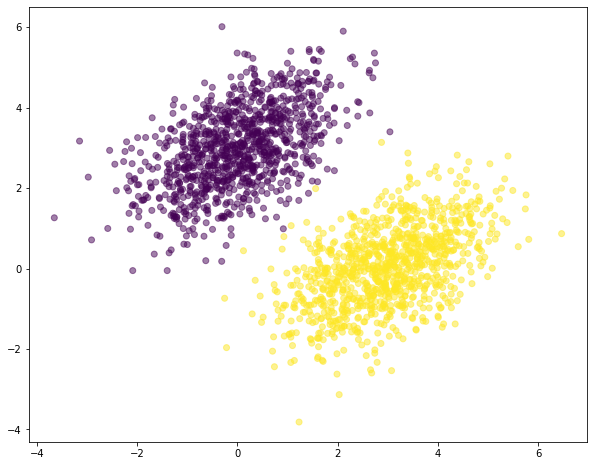

In [26]:
# visualize the two classes, color points based on the target labels
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0], alpha=0.5);

Create a linear classifier using TensorFlow tensors variables.  As we have discussed, a linear classifier simply performs
an affine transformation (a weight sum of the inputs and a shift by bias terms)
`(prediction = W @ input + b)`.
We will train it to minimize the square of the difference
between predictions and targets

Create variables `W` for model parameter weights and `b` for the bias terms, initialzed with random values and with zeros respectively.

In [27]:
# the inputs will be 2D points
input_dim = 2

# the output predicitons will be a single score per sample (close to 0 if the sample is predicted to be class 0, and close
# to 1 if the sample is predicted to be class 1).
output_dim = 1

# create TensorFlow variables of the appropriate shape for this linear classification model
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [28]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5519161 ],
       [0.17771065]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Compute a forward pass, this function assumes global defined parameter matrix `W` and bias vector `b`.

In [29]:
def model(inputs):
    """Perform a forward pass on a set of inputs using TensorFlow operations.
    This function assume and uses globaly defined weight matrix W and bias vector
    b
    """
    return tf.matmul(inputs, W) + b

The operation ends up berforming a weightd sum and adding in the bias, e.g. `prediction = w1 * x + w2 * y + b`.
`w1` and `w2` represent $\theta_1$ and $\theta_2$ parameters of a linear classifier as we have defined them previously, and
`b` would be $\theta_0$.

Next define a simple mean squared error loss function to use for gradient descent optimization.

In [30]:
def square_loss(predictions, targets):
    """Compute mean squared error.  We are given the targets and predicitons
    as TensorFlow variables.  They are expected to be vectors of the same size, representing
    predictions and target labels for some number of training input samples.
    """
    # per_sample_losses will be a tensor with the same shape as targets and predictions, containing per-sample loss scores
    per_sample_losses = tf.square(targets - predictions)
    
    # we need to sum the per sample losses to a single loss value and take the mean of thes sum of the square losses
    return tf.reduce_mean(per_sample_losses)

Next is a function for performing training steps.  This takes training data and updates the weights `W` and
bias terms `b` so as to reduce the loss on the data.

In [31]:
# gradient descent meta_parameter
learning_rate = 0.1

def training_step(inputs, targets):
    """Perform a single step of training.  Use a TensorFlow gradient tape to
    perform pass, compute loss, and then calculate gradients to perform
    gradient descent.
    """
    # forward pass inside a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
        
    # calculate gradients with respect to W and b
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    
    # update the weights based on gradients by taking a step in correct direction scaled
    # by the learning rate
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    # we return the loss for reporting purposes when performing training steps
    return loss

We do *full batch training* rather than *mini-batch training* for simplicity: e.g. run each training step (gradient
computation and weight update) for all training data.

Full batch training should require fewer training steps, and we should use a larger learning rate than we
typically would use for mini-batches.

In [32]:
# perform 40 full batch epochs of training
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.7985
Loss at step 1: 0.1995
Loss at step 2: 0.1171
Loss at step 3: 0.1003
Loss at step 4: 0.0925
Loss at step 5: 0.0864
Loss at step 6: 0.0810
Loss at step 7: 0.0760
Loss at step 8: 0.0715
Loss at step 9: 0.0674
Loss at step 10: 0.0637
Loss at step 11: 0.0603
Loss at step 12: 0.0572
Loss at step 13: 0.0543
Loss at step 14: 0.0517
Loss at step 15: 0.0494
Loss at step 16: 0.0472
Loss at step 17: 0.0453
Loss at step 18: 0.0435
Loss at step 19: 0.0419
Loss at step 20: 0.0404
Loss at step 21: 0.0391
Loss at step 22: 0.0378
Loss at step 23: 0.0367
Loss at step 24: 0.0357
Loss at step 25: 0.0348
Loss at step 26: 0.0339
Loss at step 27: 0.0331
Loss at step 28: 0.0324
Loss at step 29: 0.0318
Loss at step 30: 0.0312
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0298
Loss at step 34: 0.0294
Loss at step 35: 0.0290
Loss at step 36: 0.0287
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0278


There is some randomness, but usually training slows done to below 0.02 after 30 or so epochs.

We will use a threshold of 0.5 to determine if prediction is a 0 or 1. 

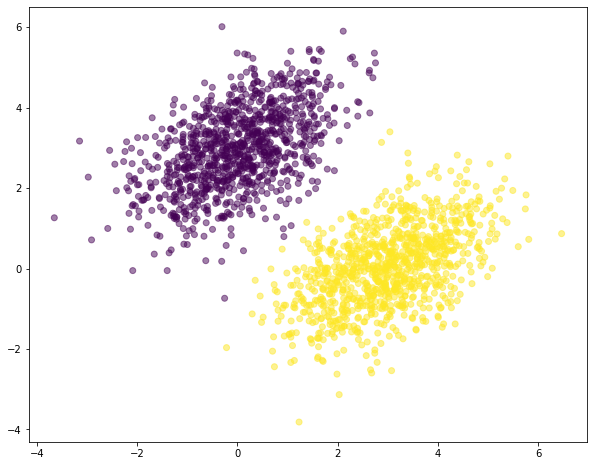

In [33]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5, alpha=0.5);

You may need to examine closely, but some points close to border will be misclassified, though majority will be correctly classified.

Here the trained weight and bias parameters form the equation of a line in the 2D plane.  The decision boundary is made at a value of
0.5.  Thus the decision boundary line has the equation `w1 * x + w2 * y + b = 0.5`.  A little algebra/geometry allows us to plot this line.

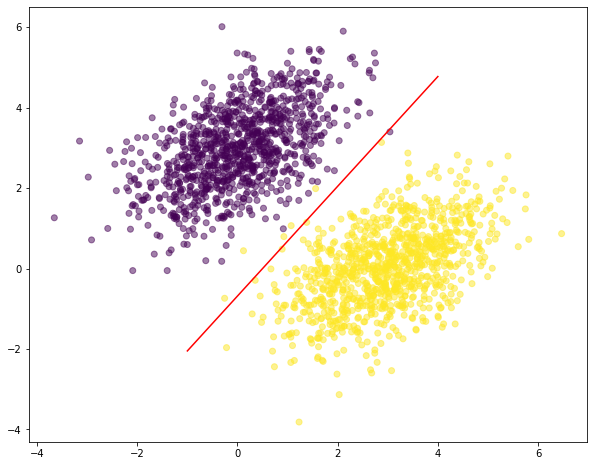

In [34]:
# generate 100 regularly spaced numbers between -1 and 4 which we will use to plot the decision boundary
x = np.linspace(-1, 4, 100)

# this is the equation of our line, plugging in the weight and bias parameters to compute y position
# for the x feature.  This line is the location where predictions change from $< 0.5$ to $> 0.5$
y = (-W[0] / W[1]) * x + (0.5 - b) / W[1]

# plot the decision boundary as a red line
plt.plot(x, y, '-r')

# replot the samples as well, though here I plot using the label for color different from text, to make
# it easier to spot misclassified samples
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0], alpha=0.5);

# 3.6 Anatomy of a neural network: Understanding core Keras APIs

The Keras API is a high-level interface for creating and training neural network and deep neural network models.  It uses the 
same mechansims we just used above of TensorFlow variables and gradient calculations behind the scenes.  But for the most part you
don't have to worry about the details of representing layer model parameters, calculating gradients, performing batch training, etc.

## 3.6.1 Layers: The building blocks of deep learning

The fundamental data structure of a neural network is the *layer*.  A typical layer acts like a single set of weight and bias
terms as we just worked with for a simple linear classification model.

A layer is a data processing module that takes as input one or more tensors, and that outputs one or more tensors.  Some layers
are stateless, but more frequently layers have a state: the layer's *weights* (and biases, together these are the trainable
parameters of the model).  These are represented as tensors that are trained using stochastic gradient descent.  This training
causes the layer (and model as a whole) to learn a function to transform the inputs into the desired outputs.

We will learn about different types of layers with different properties.  The simplest is a *densely connected* layer, also
called a *fully connected* or *dense* layer (the `Dense` class in Keras).  

You can think of layers as the LEGO bricks of deep learning.  Building deep learning models in Keras is done by
clipping together compatible layers to form useful data-transformation pipelines.


### The base layer class in Keras
Keras is an object-oriented design.  It has a `Layer` abstract base class, from which all specialized layers
are derived from.

We can build a layer ourself by extending the Keras API (though of course Keras already defines a `Dense` layer for us to use.

In [35]:
class SimpleDense(keras.layers.Layer):
    """All Keras layers inherit from the base Layer class
    """
    
    def __init__(self, units, activation=None):
        """Constructor, call superclass constructor first.
        units are the number of (hidden) units for this layer, which
           will also define the number of outputs of this layer
        activation is the activation (or output) function for
            this layer, if any (e.g. relu or sigmoid).
        """
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        """build method when building a model.
        """
        input_dim = input_shape[-1]
        # add_weight is a shortcut method for creating weights.  Can also create standalone
        # TensorFlow variables, e.g. tf.Variable() as we did before.
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        
    def call(self, inputs):
        """Call method performs forward pass computation of this layer
        """
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

Once instantiated, a layer can be used just like a function, taking as input a TensorFlow tensor:

In [36]:
# instantiate our layer, 32 outputs using relu activation function
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

# create some test inputs, shape (2,784) means there are two samples, with 784 input features into
# this layer
input_tensor = tf.ones(shape=(2,784))

# call the layer on the inputs, just like a function.  Note that the call() function is being
# invoked here to perform a forward pass.
output_tensor = my_dense(input_tensor)

# since there were 2 samples in the input, and since there are 32 (output) units in this layer, the
# result from the forward pass is a (2,32) shaped output tensor, 32 outputs for each of the 2 sample inputs.
print(output_tensor.shape)

(2, 32)


### Automatic shape inference: Building layers on the fly

An astute observer will see that we didn't specify the input_dim in the build function above, nor did we call
or invoke build anywhere.  Also if you know Python, it is actuall the `__call__()` method that is implicitly
called when you invoke a class instance as we did when we performed `my_dense(input_tensor)`.  So how were
the `build()` and `call()` functions used?

Can only "clip" together layers that are compatible.  This mainly means that each layer accepts inputs that it
expectes to be of a certain shape, and it returns output tensors of a(nother) certain shape.

For example

```python
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
```

will have the 0th dimension be the same as the number of samples of input, and the first dimension of the output will be 32.  It can only
be connected to a downstream layer that expects 32-dimensional vectors as its input.

Most of the time, Keras infers and handles size compatibility for you.  You don't have to do a lot of explicit stating of tensor shapes
and sizes.

For instance.

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

The layers didn't receive information about the shape of their inputs, instead they automatically inferr their input
shape as being the shape of the first inputs that they see.

In the `SimpleDense` example layer we don't create the weights in the constructor.  Instead they are created in
a dedicated state-creation method, `build()`, which is called 1 time and receives as an argument the first input shape seen by
the layer.

The `build()` layer is called automatically the first time the layer is called.  Likewise, the `__call__()` method of the
base class calls the derived class `call()` method to perform the forward pass calculation.  This simplifies model
creation, and allows for more complex layer use cases.


## 3.6.2 From layers to models

A deep learning model is a graph of layers.

Can create model graphs using the `Model` class.

`Sequential` models are the simplest type of graph, stacks of layers where each layer gets input from the previous and sends output
to the next layer (except of course the first and last layers respectively).

But we can have more complex model graphs, including models with two or more branches of processing, more than a single input layer, to 
allow for two different but related inputs, residual connections.

The topology of a model defines a *hypothesis space*.

You make assumptions about your data.  These define what can be learned.  The hypothesis space of your model is extremely
important.  It encodes these assumptions being made about the problem. Thus picking or designing the right network architecutre is
difficult, and more art than science.  Though we will review some best practices on some common architectures that work well for
certain classes of problems.


## 3.6.3 The "compile" step: Configuring the learning process

Once you have settled on the model architecture, you still have 3 more things to specify

1. **Loss function (objective function, fitness function)** - The quantity that will be minimized during traing.  It represents
   a measure of success for the task.
2. **Optimizer** - Determines how network is updated based on the loss.  Usually stochastic gradient descent (SGD)
   modified in various ways to increase the search/optimization performance.
3. **Metrics** - The measures of success you want to monitor during training and validation, such as classification
   accuracy.  Training does not (and can not) optimize directly for these metrics.  But need loss functions that will
   translate to improving the desired metrics (not always easy or straight forward).
   
Once these are chosen, you `compile()` the model.  This is were you specify these 3 parts of the training.  Then you will call
`fit()` to perform actual batch training, fitting the model parameters to the desired outputs.

The `compile()` method configures the training process.  

In [38]:
# define a linear classifier
model = keras.Sequential([keras.layers.Dense(1)])

# specify an optimizer, there are many to choose from
# specify a loss function
# specify a list of metrics, can ask for reports on more than 1 metric
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

## 3.6.4 Picking a loss function

Choosing the right loss function for your problem is extremely important.  If the objective doesn't correlate well with the
desired success for the task, you network will end up doing things you don't want.

## 3.6.5 Understanding the `fit()` method

After `compile()` we are ready to `fit()`.  The `fit()` method is the training loop.

We need the following arguments for training

- The **data** (inputs and targets) to train on.
- The number of **epochs** of training to perform.  (can specify other types of stopping conditions).
- The batch size to use within each epoch of mini-batch gradient descent.  This is th enumber of
  training examples considered to compute the gradients for one weight update.

In [39]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)


Epoch 1/5


2022-02-02 15:36:04.957207: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-02 15:36:04.958228: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000005000 Hz


16/16 [==============================] - 0s 903us/step - loss: 8.5239 - accuracy: 0.2150
Epoch 2/5
16/16 [==============================] - 0s 882us/step - loss: 8.1965 - accuracy: 0.2250
Epoch 3/5
16/16 [==============================] - 0s 890us/step - loss: 7.9766 - accuracy: 0.2213
Epoch 4/5
16/16 [==============================] - 0s 871us/step - loss: 7.6219 - accuracy: 0.2295
Epoch 5/5
16/16 [==============================] - 0s 897us/step - loss: 7.4617 - accuracy: 0.2445


The call to `fit()` returns a `History` object.  This object contains a `history` field which is a dictionary that gives 
a history of the metrics and loss over the training epochs.

In [40]:
history.history

{'loss': [8.555595397949219,
  8.228400230407715,
  7.951615810394287,
  7.684920310974121,
  7.427093982696533],
 'accuracy': [0.21150000393390656,
  0.2199999988079071,
  0.2240000069141388,
  0.23000000417232513,
  0.23549999296665192]}

## 3.6.6 Monitoring loss and metrics on validation data

The goal of machine learning is to obtain models that perform well in general, on data that it has not seen before (generalization).

It's standard practice to reserve a subset of the training data as **validation data**.  You won't be training the model on this
validation data, but you will use it to compute the loss and metrics value on data unseen by the model.

You do this using the `validation_data` argument in `fit()`.

In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])


# need to avoid having samples from only 1 class in validation data, shuffling the data before
# splitting is one way to do this.
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# there are more sophisticated ways to perform train/validation/test splits
# here do it by hand, reserve 30% of the training data for validation
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

# now we fit again, giving the validation data separately and use donly to monitor
# the validation loss and metrics.
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)


Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.5561 - binary_accuracy: 0.8457 - val_loss: 0.0370 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0670 - binary_accuracy: 0.9686 - val_loss: 0.0745 - val_binary_accuracy: 0.9833
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0751 - binary_accuracy: 0.9512 - val_loss: 0.1000 - val_binary_accuracy: 0.9767
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0722 - binary_accuracy: 0.9627 - val_loss: 0.1060 - val_binary_accuracy: 0.8967
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0734 - binary_accuracy: 0.9435 - val_loss: 0.0328 - val_binary_accuracy: 0.9967


Notice loss and accuracy are reported both for the training data and for the validation data.

Can use evaluate on a trained model, to for example calculate validation loss and metrics explicitly.

In [42]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
print(loss_and_metrics)

5/5 [==============================] - 0s 2ms/step - loss: 0.0328 - binary_accuracy: 0.9967
[0.03284130245447159, 0.996666669845581]


## 3.6.7 Inference: Using a model after training

Once trained, you will want to make some predictions.  This is called **inference**.  Can just call the model directly.
Or can use predict function to make predictions in batches.

In [43]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.1268931 ]
 [ 0.05255553]
 [ 0.80638456]
 [-0.00535828]
 [-0.13536203]
 [ 0.793285  ]
 [-0.35692018]
 [-0.05819654]
 [ 0.83199596]
 [-0.2232508 ]]
